In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.datasets import load_digits

data = load_digits()

df = pd.DataFrame({
    'features': data.data.astype('int').tolist(),
    'ground truth': data.target.tolist(),
    '_id': np.arange(len(data.data)).astype('str')
})

df.head()

,_id,features,ground truth
0,0,"[0, 0, 5, 13, 9, 1, 0, 0, 0, 0, 13, 15, 10, 15...",0
1,1,"[0, 0, 0, 12, 13, 5, 0, 0, 0, 0, 0, 11, 16, 9,...",1
2,2,"[0, 0, 0, 4, 15, 12, 0, 0, 0, 0, 3, 16, 15, 14...",2
3,3,"[0, 0, 7, 15, 13, 1, 0, 0, 0, 8, 13, 6, 15, 4,...",3
4,4,"[0, 0, 0, 1, 11, 0, 0, 0, 0, 0, 0, 7, 8, 0, 0,...",4


In [3]:
from chissl.image import img2base64
from PIL import Image

df['src'] = df.features\
    .apply(lambda xi: ((16*(16 - np.array(xi)) - 1).reshape((8,8))).clip(0, 255).astype(np.uint8))\
    .apply(Image.fromarray, mode='L')\
    .apply(Image.Image.resize,
           size=(50, 50),
           resample=Image.BICUBIC)\
    .apply(img2base64)
    
df.head()

,_id,features,ground truth,src
0,0,"[0, 0, 5, 13, 9, 1, 0, 0, 0, 0, 13, 15, 10, 15...",0,"{'type': 'image/png', 'data': 'iVBORw0KGgoAAAA..."
1,1,"[0, 0, 0, 12, 13, 5, 0, 0, 0, 0, 0, 11, 16, 9,...",1,"{'type': 'image/png', 'data': 'iVBORw0KGgoAAAA..."
2,2,"[0, 0, 0, 4, 15, 12, 0, 0, 0, 0, 3, 16, 15, 14...",2,"{'type': 'image/png', 'data': 'iVBORw0KGgoAAAA..."
3,3,"[0, 0, 7, 15, 13, 1, 0, 0, 0, 8, 13, 6, 15, 4,...",3,"{'type': 'image/png', 'data': 'iVBORw0KGgoAAAA..."
4,4,"[0, 0, 0, 1, 11, 0, 0, 0, 0, 0, 0, 7, 8, 0, 0,...",4,"{'type': 'image/png', 'data': 'iVBORw0KGgoAAAA..."


In [4]:
from chissl import chissl_mongo as cm
chissl = cm.ChisslMongo(verbose=True)

In [5]:
chissl.create_collection('Digits-data', df.to_dict(orient='records'), drop=True)

In [6]:
chissl.create_application('Digits-app',
                          'Digits-data',
                          'ImageComponent',
                          'chissl.pipelines.mnist.SimplePipeline',
                          drop=True)

{'_id': 'Digits-app',
 'collection': 'Digits-data',
 'component': 'ImageComponent',
 'params': {},
 'pipeline': 'chissl.pipelines.mnist.SimplePipeline',
 'props': {}}

In [7]:
obj = chissl.create_model('Digits-app', 'test', drop=True)

Finding application <Digits-app>...OK
Querying collection <Digits-data> <None>...found 1797...OK
Transforming data...OK
Clustering data...OK
done.


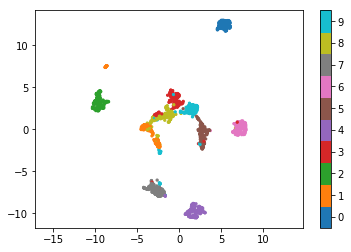

In [8]:
plt.scatter(*np.array(obj['X']).T, s=5, c=data.target, cmap='tab10', vmax=10)
plt.axis('equal')
cb = plt.colorbar()
cb.set_ticks(np.arange(10) + .5)
cb.set_ticklabels(np.arange(10).astype('str'))